In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

import cv2
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import  Flatten, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.applications import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import load_img,img_to_array

In [2]:
dataset=tf.keras.preprocessing.image_dataset_from_directory('/content/drive/MyDrive/Colab Notebooks/Image datasets/dataset')
dataset

Found 6862 files belonging to 11 classes.


<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [3]:
classes=dataset.class_names
classes

['dew',
 'fogsmog',
 'frost',
 'glaze',
 'hail',
 'lightning',
 'rain',
 'rainbow',
 'rime',
 'sandstorm',
 'snow']

In [4]:
input_shape=(224,224,3)

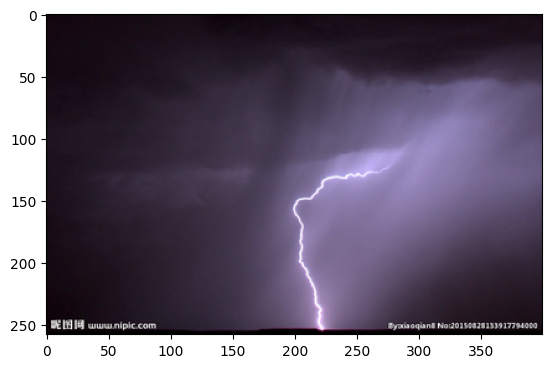

In [5]:
plt.imshow(cv2.imread('/content/drive/MyDrive/Colab Notebooks/Image datasets/dataset/lightning/1831.jpg'))

In [27]:
datagen = ImageDataGenerator(
       rotation_range=20,
       width_shift_range=0.2,
       height_shift_range=0.2,
       shear_range=0.2,
       zoom_range=0.2,
       horizontal_flip=True,
       fill_mode='nearest',
       validation_split=0.2
   )

In [28]:
training_set=datagen.flow_from_directory('/content/drive/MyDrive/Colab Notebooks/Image datasets/dataset',target_size=(224,224),batch_size=32,class_mode='categorical',subset='training')

validation_set=datagen.flow_from_directory('/content/drive/MyDrive/Colab Notebooks/Image datasets/dataset',target_size=(224,224),batch_size=32,class_mode='categorical',subset='validation')

Found 5493 images belonging to 11 classes.
Found 1369 images belonging to 11 classes.


In [29]:
base_model=VGG16(weights='imagenet',include_top=False,input_shape=input_shape)

In [30]:
model=Sequential()
model.add(base_model)
model.add(Flatten())
model.add(Dense(11,activation='softmax'))

In [31]:
model.compile(optimizer=Adam(learning_rate=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])

In [32]:
training_data=model.fit(training_set,epochs=10,validation_data=validation_set)

Epoch 1/10
172/172 ━━━━━━━━━━━━━━━━━━━━ 155s 837ms/step - accuracy: 0.3384 - loss: 2.8260 - val_accuracy: 0.5895 - val_loss: 1.1777
Epoch 2/10
172/172 ━━━━━━━━━━━━━━━━━━━━ 196s 823ms/step - accuracy: 0.6078 - loss: 1.1017 - val_accuracy: 0.6932 - val_loss: 0.9341
Epoch 3/10
172/172 ━━━━━━━━━━━━━━━━━━━━ 144s 817ms/step - accuracy: 0.6848 - loss: 0.9149 - val_accuracy: 0.7429 - val_loss: 0.8138
Epoch 4/10
172/172 ━━━━━━━━━━━━━━━━━━━━ 144s 819ms/step - accuracy: 0.7469 - loss: 0.7367 - val_accuracy: 0.7451 - val_loss: 0.7386
Epoch 5/10
172/172 ━━━━━━━━━━━━━━━━━━━━ 144s 818ms/step - accuracy: 0.7780 - loss: 0.6419 - val_accuracy: 0.7823 - val_loss: 0.6602
Epoch 6/10
172/172 ━━━━━━━━━━━━━━━━━━━━ 144s 817ms/step - accuracy: 0.7916 - loss: 0.5878 - val_accuracy: 0.7962 - val_loss: 0.5846
Epoch 7/10
172/172 ━━━━━━━━━━━━━━━━━━━━ 220s 914ms/step - accuracy: 0.8254 - loss: 0.5123 - val_accuracy: 0.8210 - val_loss: 0.5949
Epoch 8/10
172/172 ━━━━━━━━━━━━━━━━━━━━ 146s 829ms/step - accuracy: 0.8191 -

In [33]:
hist=training_data.history
hist.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

In [34]:
hist['val_accuracy'][-1]

0.867786705493927

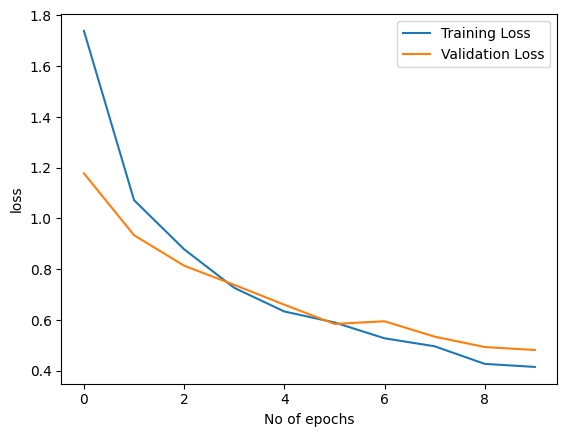

In [35]:
plt.plot(hist['loss'],label='Training Loss')
plt.plot(hist['val_loss'],label='Validation Loss')
plt.legend()
plt.xlabel('No of epochs')
plt.ylabel('loss')
plt.show()

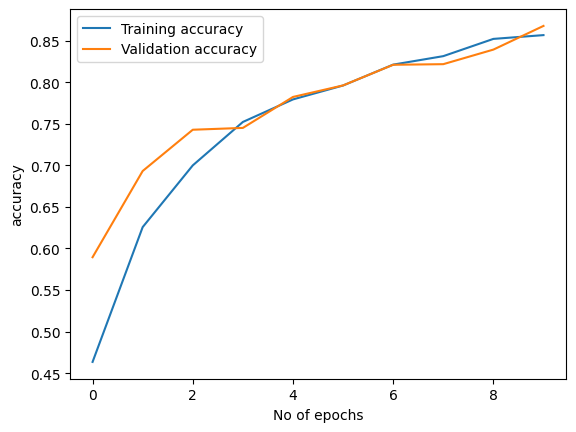

In [36]:
plt.plot(hist['accuracy'],label='Training accuracy')
plt.plot(hist['val_accuracy'],label='Validation accuracy')
plt.legend()
plt.xlabel('No of epochs')
plt.ylabel('accuracy')
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 361ms/step
Predicted Class Name dew


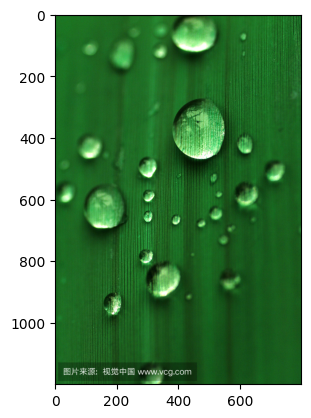

In [37]:
test_image=load_img('/content/drive/MyDrive/Colab Notebooks/Image datasets/dataset/dew/2420.jpg',target_size=(224,224))
plt.imshow(cv2.imread('/content/drive/MyDrive/Colab Notebooks/Image datasets/dataset/dew/2420.jpg'))
test_image_array=img_to_array(test_image)
test_image_array=np.expand_dims(test_image_array,axis=0)
preproccesed_image=preprocess_input(test_image_array)
result=model.predict(preproccesed_image)
predict_classes=np.argmax(result)
predict_class=classes[predict_classes]
print("Predicted Class Name",predict_class)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted Class Name fogsmog


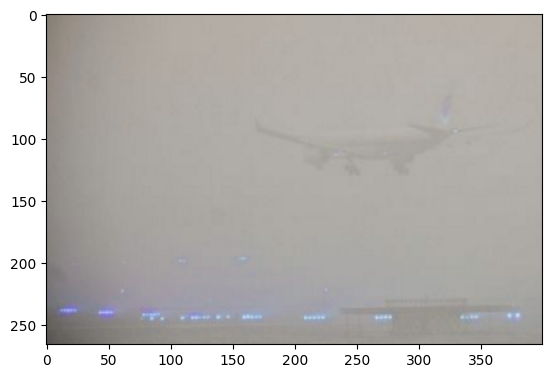

In [48]:
test_image=load_img('/content/drive/MyDrive/Colab Notebooks/Image datasets/dataset/fogsmog/4354.jpg',target_size=(224,224))
plt.imshow(cv2.imread('/content/drive/MyDrive/Colab Notebooks/Image datasets/dataset/fogsmog/4354.jpg'))
test_image_array=img_to_array(test_image)
test_image_array=np.expand_dims(test_image_array,axis=0)
preproccesed_image=preprocess_input(test_image_array)
result=model.predict(preproccesed_image)
predict_classes=np.argmax(result)
predict_class=classes[predict_classes]
print("Predicted Class Name",predict_class)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
Predicted Class Name frost


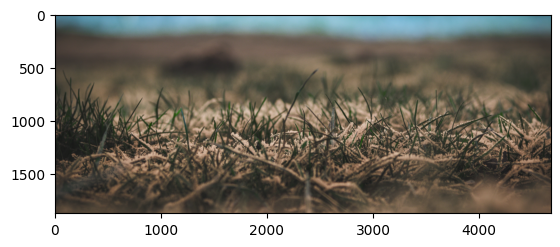

In [39]:
test_image=load_img('/content/drive/MyDrive/Colab Notebooks/Image datasets/dataset/frost/3756.jpg',target_size=(224,224))
plt.imshow(cv2.imread('/content/drive/MyDrive/Colab Notebooks/Image datasets/dataset/frost/3756.jpg'))
test_image_array=img_to_array(test_image)
test_image_array=np.expand_dims(test_image_array,axis=0)
preproccesed_image=preprocess_input(test_image_array)
result=model.predict(preproccesed_image)
predict_classes=np.argmax(result)
predict_class=classes[predict_classes]
print("Predicted Class Name",predict_class)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted Class Name glaze


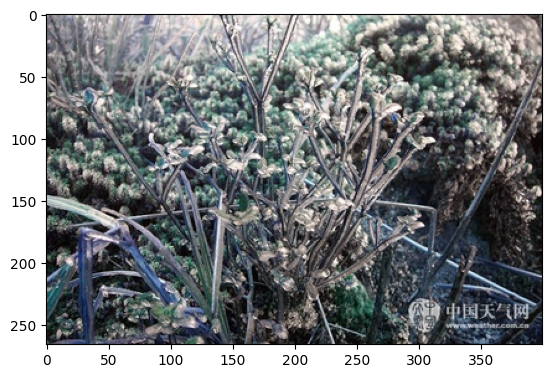

In [50]:
test_image=load_img('/content/drive/MyDrive/Colab Notebooks/Image datasets/dataset/glaze/6095.jpg',target_size=(224,224))
plt.imshow(cv2.imread('/content/drive/MyDrive/Colab Notebooks/Image datasets/dataset/glaze/6095.jpg'))
test_image_array=img_to_array(test_image)
test_image_array=np.expand_dims(test_image_array,axis=0)
preproccesed_image=preprocess_input(test_image_array)
result=model.predict(preproccesed_image)
predict_classes=np.argmax(result)
predict_class=classes[predict_classes]
print("Predicted Class Name",predict_class)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted Class Name hail


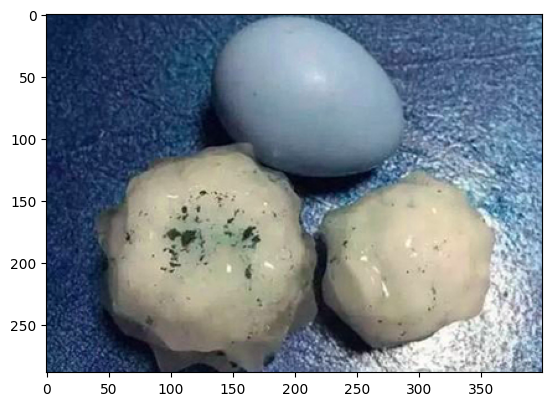

In [51]:
test_image=load_img('/content/drive/MyDrive/Colab Notebooks/Image datasets/dataset/hail/0005.jpg',target_size=(224,224))
plt.imshow(cv2.imread('/content/drive/MyDrive/Colab Notebooks/Image datasets/dataset/hail/0005.jpg'))
test_image_array=img_to_array(test_image)
test_image_array=np.expand_dims(test_image_array,axis=0)
preproccesed_image=preprocess_input(test_image_array)
result=model.predict(preproccesed_image)
predict_classes=np.argmax(result)
predict_class=classes[predict_classes]
print("Predicted Class Name",predict_class)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
Predicted Class Name lightning


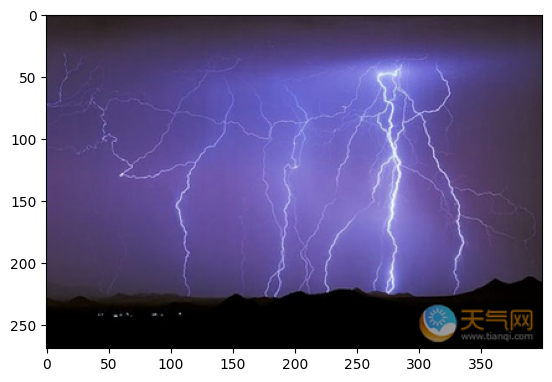

In [42]:
test_image=load_img('/content/drive/MyDrive/Colab Notebooks/Image datasets/dataset/lightning/1833.jpg',target_size=(224,224))
plt.imshow(cv2.imread('/content/drive/MyDrive/Colab Notebooks/Image datasets/dataset/lightning/1833.jpg'))
test_image_array=img_to_array(test_image)
test_image_array=np.expand_dims(test_image_array,axis=0)
preproccesed_image=preprocess_input(test_image_array)
result=model.predict(preproccesed_image)
predict_classes=np.argmax(result)
predict_class=classes[predict_classes]
print("Predicted Class Name",predict_class)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Predicted Class Name rain


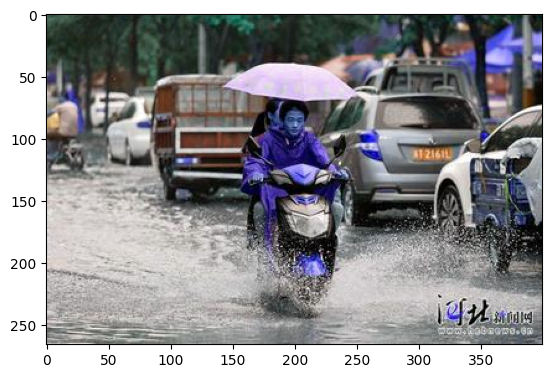

In [43]:
test_image=load_img('/content/drive/MyDrive/Colab Notebooks/Image datasets/dataset/rain/1013.jpg',target_size=(224,224))
plt.imshow(cv2.imread('/content/drive/MyDrive/Colab Notebooks/Image datasets/dataset/rain/1013.jpg'))
test_image_array=img_to_array(test_image)
test_image_array=np.expand_dims(test_image_array,axis=0)
preproccesed_image=preprocess_input(test_image_array)
result=model.predict(preproccesed_image)
predict_classes=np.argmax(result)
predict_class=classes[predict_classes]
print("Predicted Class Name",predict_class)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted Class Name rainbow


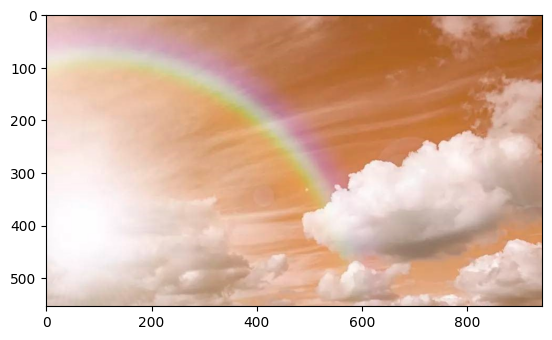

In [44]:
test_image=load_img('/content/drive/MyDrive/Colab Notebooks/Image datasets/dataset/rainbow/0592.jpg',target_size=(224,224))
plt.imshow(cv2.imread('/content/drive/MyDrive/Colab Notebooks/Image datasets/dataset/rainbow/0592.jpg'))
test_image_array=img_to_array(test_image)
test_image_array=np.expand_dims(test_image_array,axis=0)
preproccesed_image=preprocess_input(test_image_array)
result=model.predict(preproccesed_image)
predict_classes=np.argmax(result)
predict_class=classes[predict_classes]
print("Predicted Class Name",predict_class)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
Predicted Class Name rime


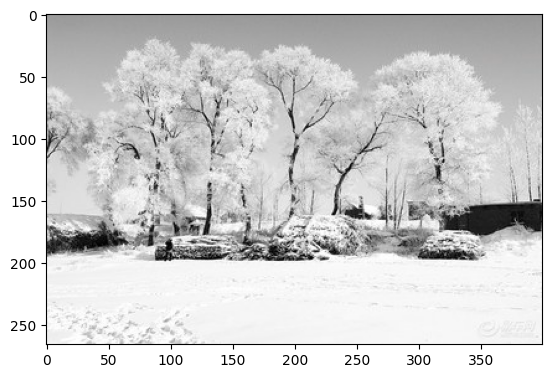

In [53]:
test_image=load_img('/content/drive/MyDrive/Colab Notebooks/Image datasets/dataset/rime/4938.jpg',target_size=(224,224))
plt.imshow(cv2.imread('/content/drive/MyDrive/Colab Notebooks/Image datasets/dataset/rime/4938.jpg'))
test_image_array=img_to_array(test_image)
test_image_array=np.expand_dims(test_image_array,axis=0)
preproccesed_image=preprocess_input(test_image_array)
result=model.predict(preproccesed_image)
predict_classes=np.argmax(result)
predict_class=classes[predict_classes]
print("Predicted Class Name",predict_class)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
Predicted Class Name sandstorm


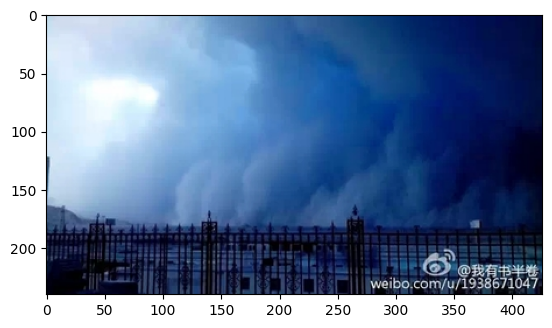

In [59]:
test_image=load_img('/content/drive/MyDrive/Colab Notebooks/Image datasets/dataset/sandstorm/2918.jpg',target_size=(224,224))
plt.imshow(cv2.imread('/content/drive/MyDrive/Colab Notebooks/Image datasets/dataset/sandstorm/2918.jpg'))
test_image_array=img_to_array(test_image)
test_image_array=np.expand_dims(test_image_array,axis=0)
preproccesed_image=preprocess_input(test_image_array)
result=model.predict(preproccesed_image)
predict_classes=np.argmax(result)
predict_class=classes[predict_classes]
print("Predicted Class Name",predict_class)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Predicted Class Name snow


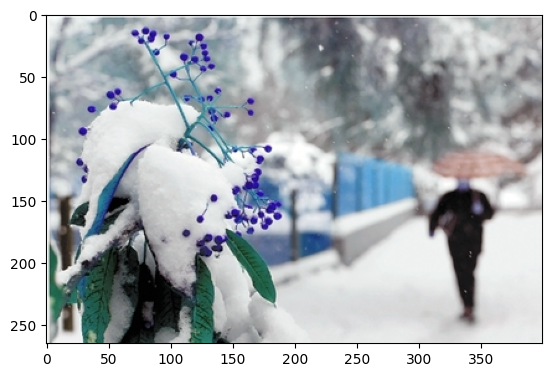

In [60]:
test_image=load_img('/content/drive/MyDrive/Colab Notebooks/Image datasets/dataset/snow/0831.jpg',target_size=(224,224))
plt.imshow(cv2.imread('/content/drive/MyDrive/Colab Notebooks/Image datasets/dataset/snow/0831.jpg'))
test_image_array=img_to_array(test_image)
test_image_array=np.expand_dims(test_image_array,axis=0)
preproccesed_image=preprocess_input(test_image_array)
result=model.predict(preproccesed_image)
predict_classes=np.argmax(result)
predict_class=classes[predict_classes]
print("Predicted Class Name",predict_class)